# 零售業數據分析
---
### 數據背景
本資料模擬美國 Macy's 百貨於各地據點的銷售紀錄，時間範圍涵蓋 2023～2024年度，<br>資料為月份級（monthly）粒度。每筆紀錄代表某品牌在特定門市、特定月份的淨銷售金額，<br>並包含顧客來源、商店型態等描述欄位。資料內容可用於分析品牌表現、門市策略、旅遊人潮影響等多面向議題。
### 目標
#### 我們的目標是要從這一個數據集中挖掘潛藏的商業或消費行為模式，我打算對這筆資料進行探索式分析
<br>

通常在數據分析前，對數據集的每一個特徵有更多的了解會更好
### 資料欄位說明

- **ID**：每筆資料的唯一編號
- **Month / Year**：交易發生的月份與年份
- **Brand**：消費品牌（如 Armani、Coach 等）有一堆
- **Location**：門市名稱與地點（如 Macy's San Diego Fashion Valley）有一堆
- **StoreType**：店鋪型態(SIS：店中店，也就是在百貨公司內的專櫃，佔地較小。FSS：旗艦店，具有代表性的門市，規模大，功能全面)
- **Nationality**：消費者國籍，有一堆
- **Type**：消費者類型，好像只有Tourist
- **Net Sales**：當月銷售總額（單位：美元）

In [1]:
# 載入資料科學相關套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')
# 載入資料
df = pd.read_csv("Retail_dataset.csv", encoding='big5')
# 秀出前五列的資料集
df.head()

,ID,Month,Year,Brand,Location,StoreType,Nationality,Type,Net Sales (USD)
0,1,January,2023,Armani,Macy's San Diego Fashion Valley,SIS,India,Tourist,110.70
1,2,January,2023,Armani,Macy's San Diego Fashion Valley,SIS,Korea,Tourist,269.70
2,3,January,2023,Armani,Macy's San Diego Fashion Valley,SIS,Europe,Tourist,359.10
3,4,January,2023,Armani,Macy's San Diego Fashion Valley,SIS,Singapore,Tourist,476.10
4,5,January,2023,Armani,Macy's San Diego Fashion Valley,SIS,Middle East,Tourist,720.69


In [9]:
# 粗略觀察數據集的相關資訊
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112231 entries, 0 to 112230
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               112231 non-null  int64  
 1   Month            112231 non-null  object 
 2   Year             112231 non-null  int64  
 3   Brand            112231 non-null  object 
 4   Location         112231 non-null  object 
 5   StoreType        112231 non-null  object 
 6   Nationality      112231 non-null  object 
 7   Type             112231 non-null  object 
 8   Net Sales (USD)  112231 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 7.7+ MB


In [135]:
df.describe()

,ID,Year,Net Sales (USD)
count,112231.000000,112231.000000,112231.000000
mean,56115.999991,2023.789586,840.289942
std,32398.443353,0.407605,4081.622540
min,1.000000,2023.000000,-2534.655000
25%,28058.500000,2024.000000,65.700000
50%,56116.000000,2024.000000,158.100000
75%,84173.500000,2024.000000,487.815000
max,112230.000000,2024.000000,449764.310100


這筆資料集完全沒有缺失值，類別型的欄位也佔大多數，酷喔

# 單變數分析

## 目標變數(銷售額)分析
---
我們假設Net sales欄位為目標變數，畢竟在這個數據集中它是一切的核心

Text(0.5, 1.0, 'Net sales distribution')

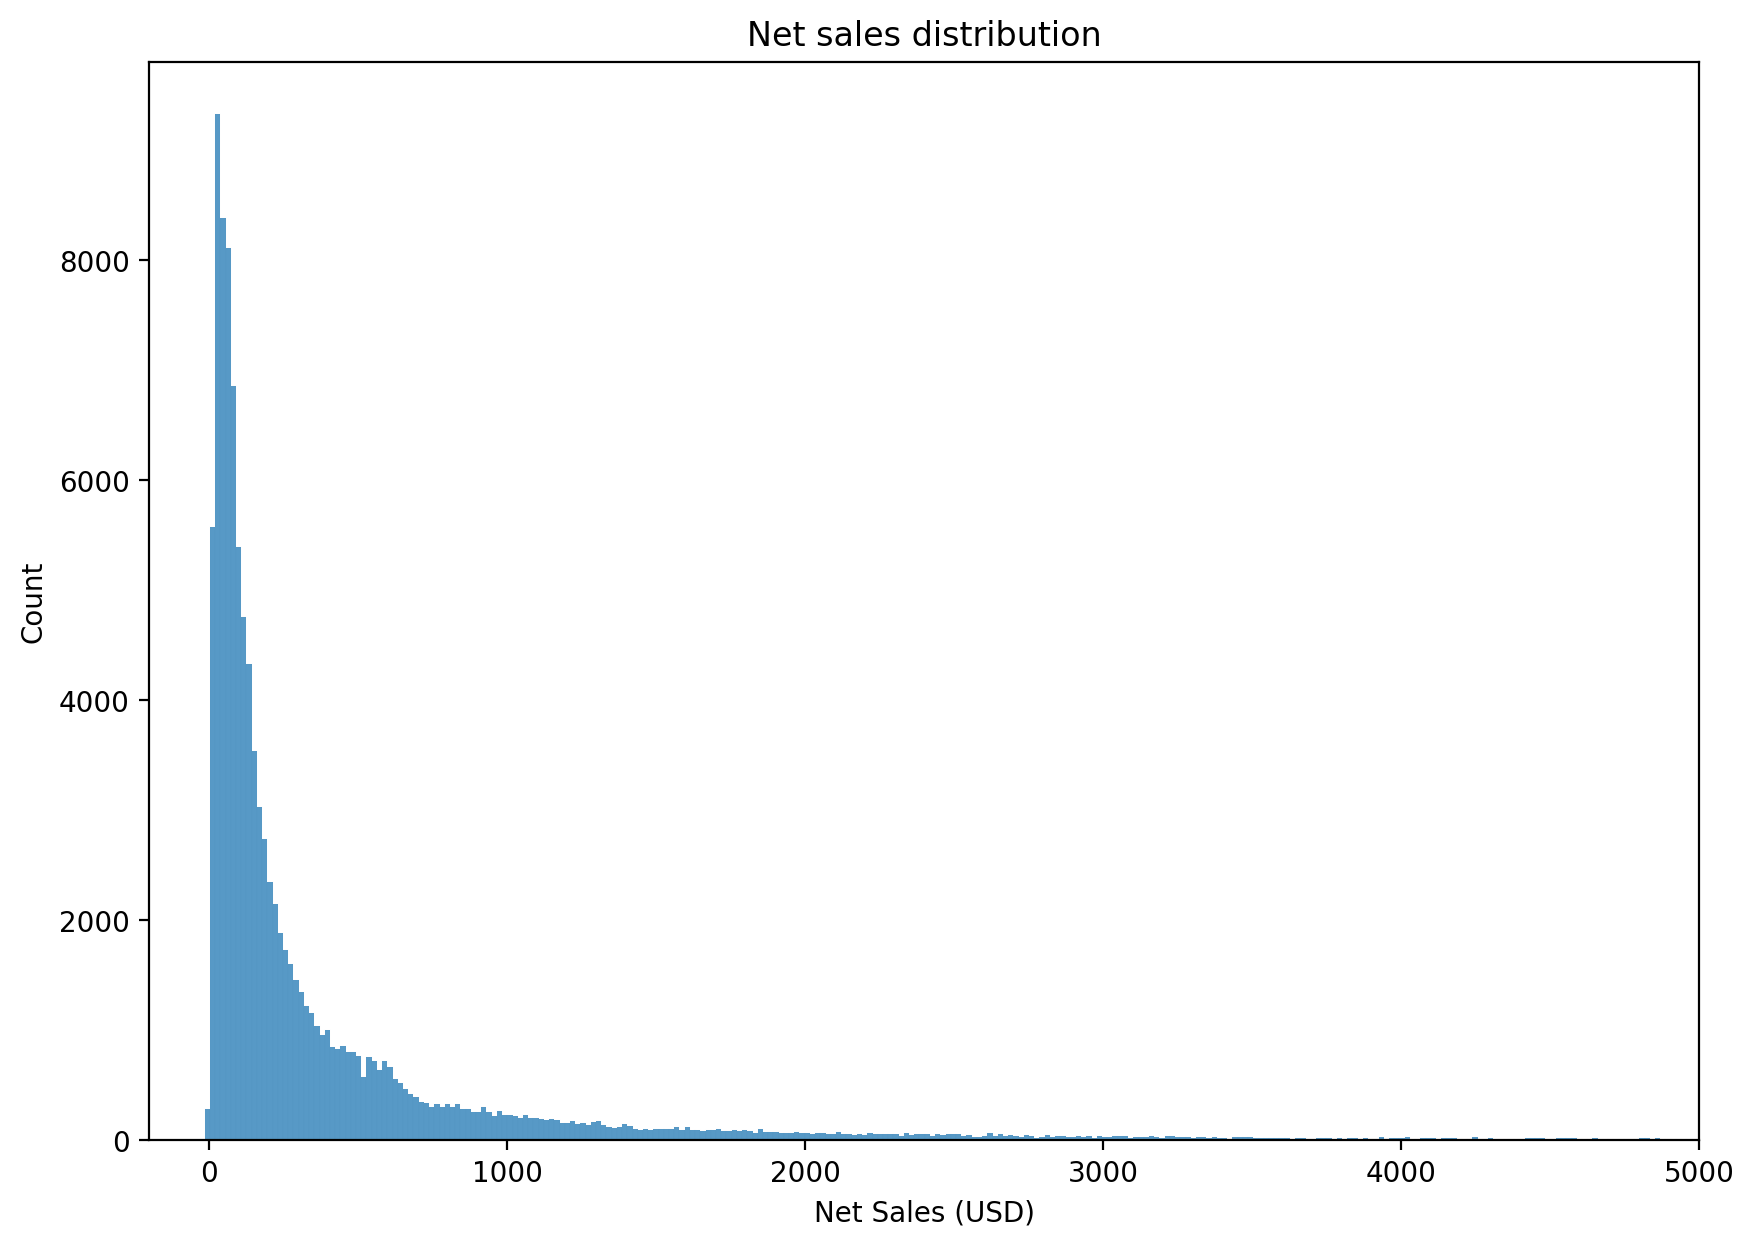

In [23]:
plt.figure(figsize = (10, 7))
sns.histplot(df['Net Sales (USD)'])
plt.xlim([-200, 5000])
plt.title('Net sales distribution')

In [25]:
print(f"偏度：{df['Net Sales (USD)'].skew()}")
print(f"峰度：{df['Net Sales (USD)'].kurt()}")

偏度：30.62910691357322
峰度：1976.8862105938044


透過視覺化的圖表和偏度與峰度的統計量，我們可以瞭解到淨收益的分布**極度右偏**，代表大多數的銷售額都集中在左側，也就是大多數的花費偏低，<br>
，但我們看到圖表右邊的尾巴以及峰度的統計量(高到靠北)，這顯示出我們有一大堆的離群值在右邊的尾巴上，而它們的銷售額都很高<br>
我來做一下重點整理
- 大多數的銷售額偏低，集中在左側。
- 銷售額存在負值，這說明可能有退貨等情況發生。
- 右尾有大量的離群值，有些遊客的花費超高，而這些離群值可能會拉高整體銷售額的平均。

## 檢視月份分布

<Axes: xlabel='count', ylabel='Month'>

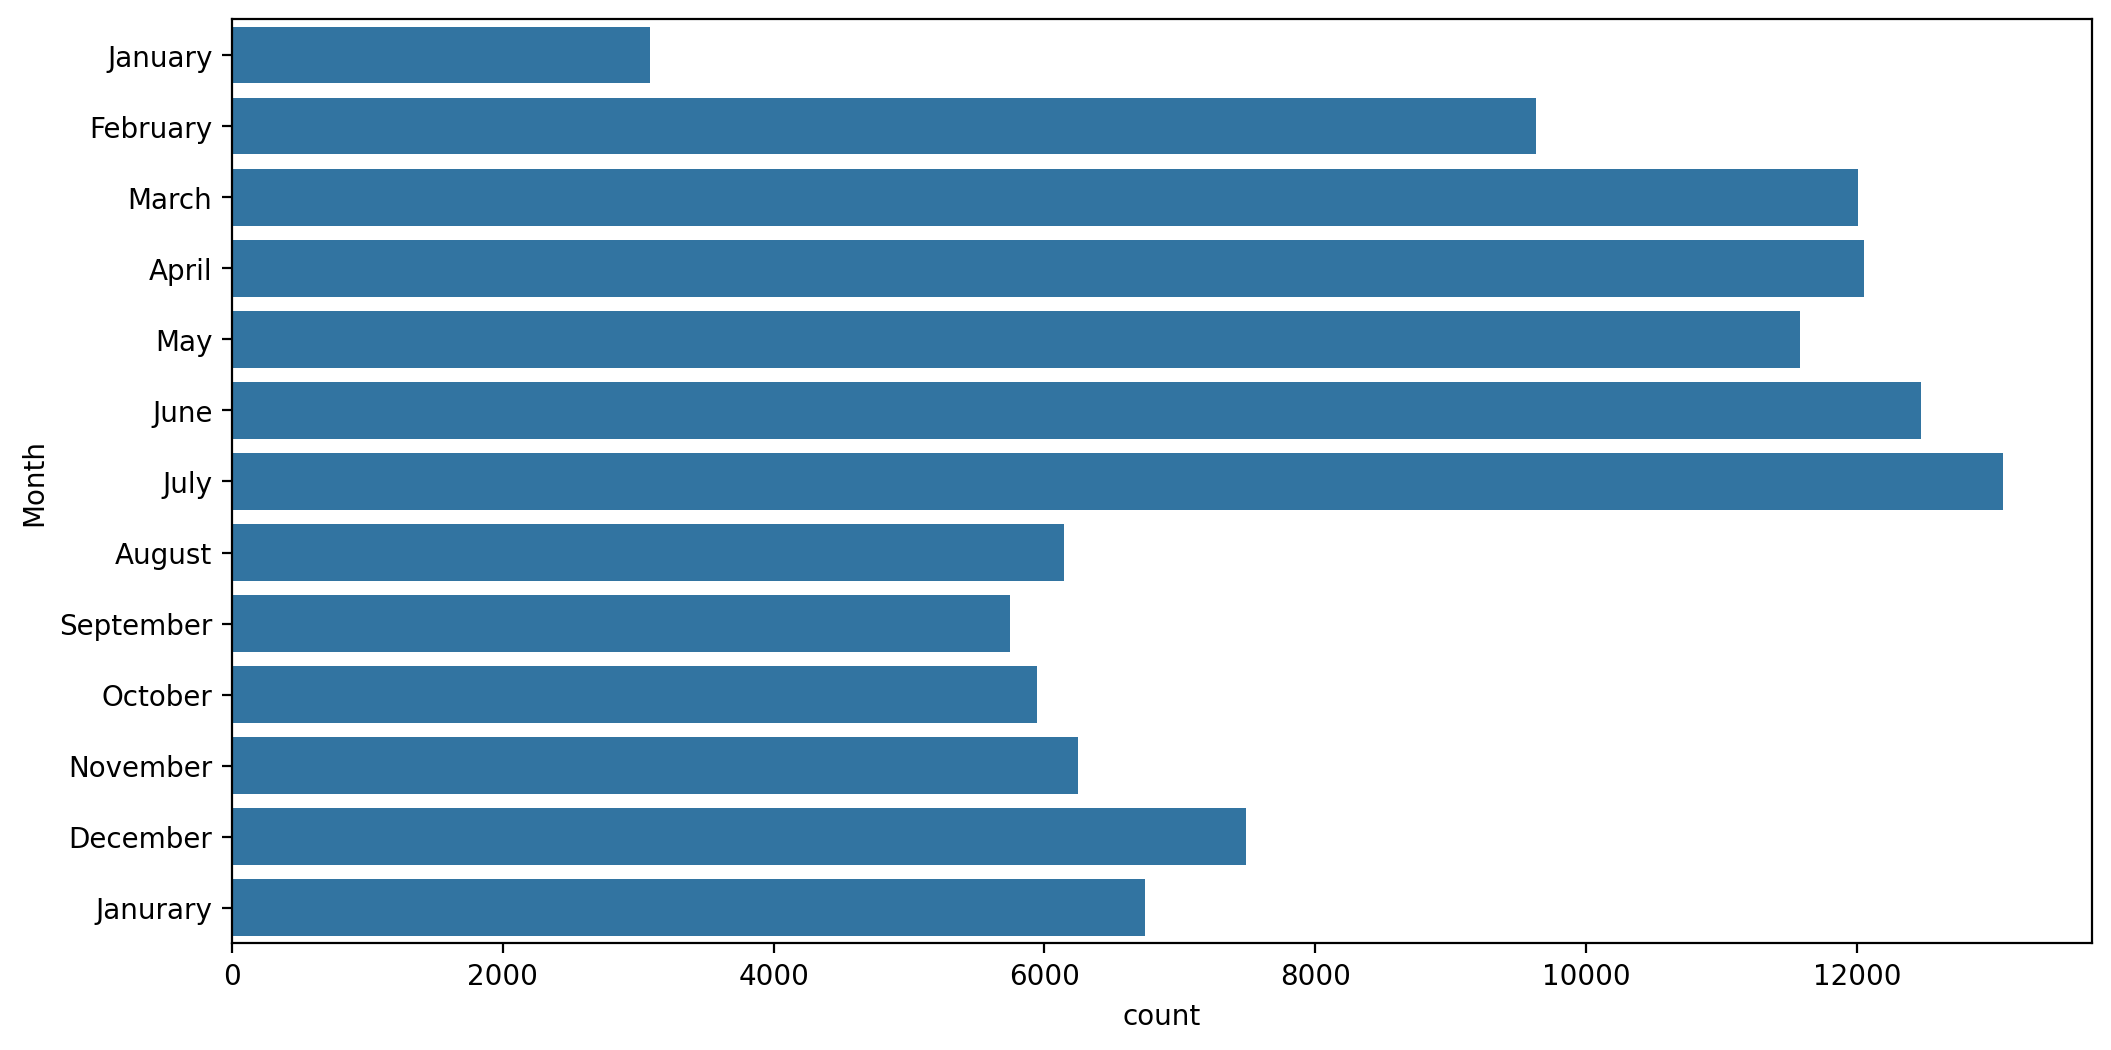

In [27]:
plt.figure(figsize = (12, 6))
sns.countplot(df['Month'])

我們可以觀察到，銷售額次數最多的時候集中在**二月到七月**的時候

## 檢視Location的分布

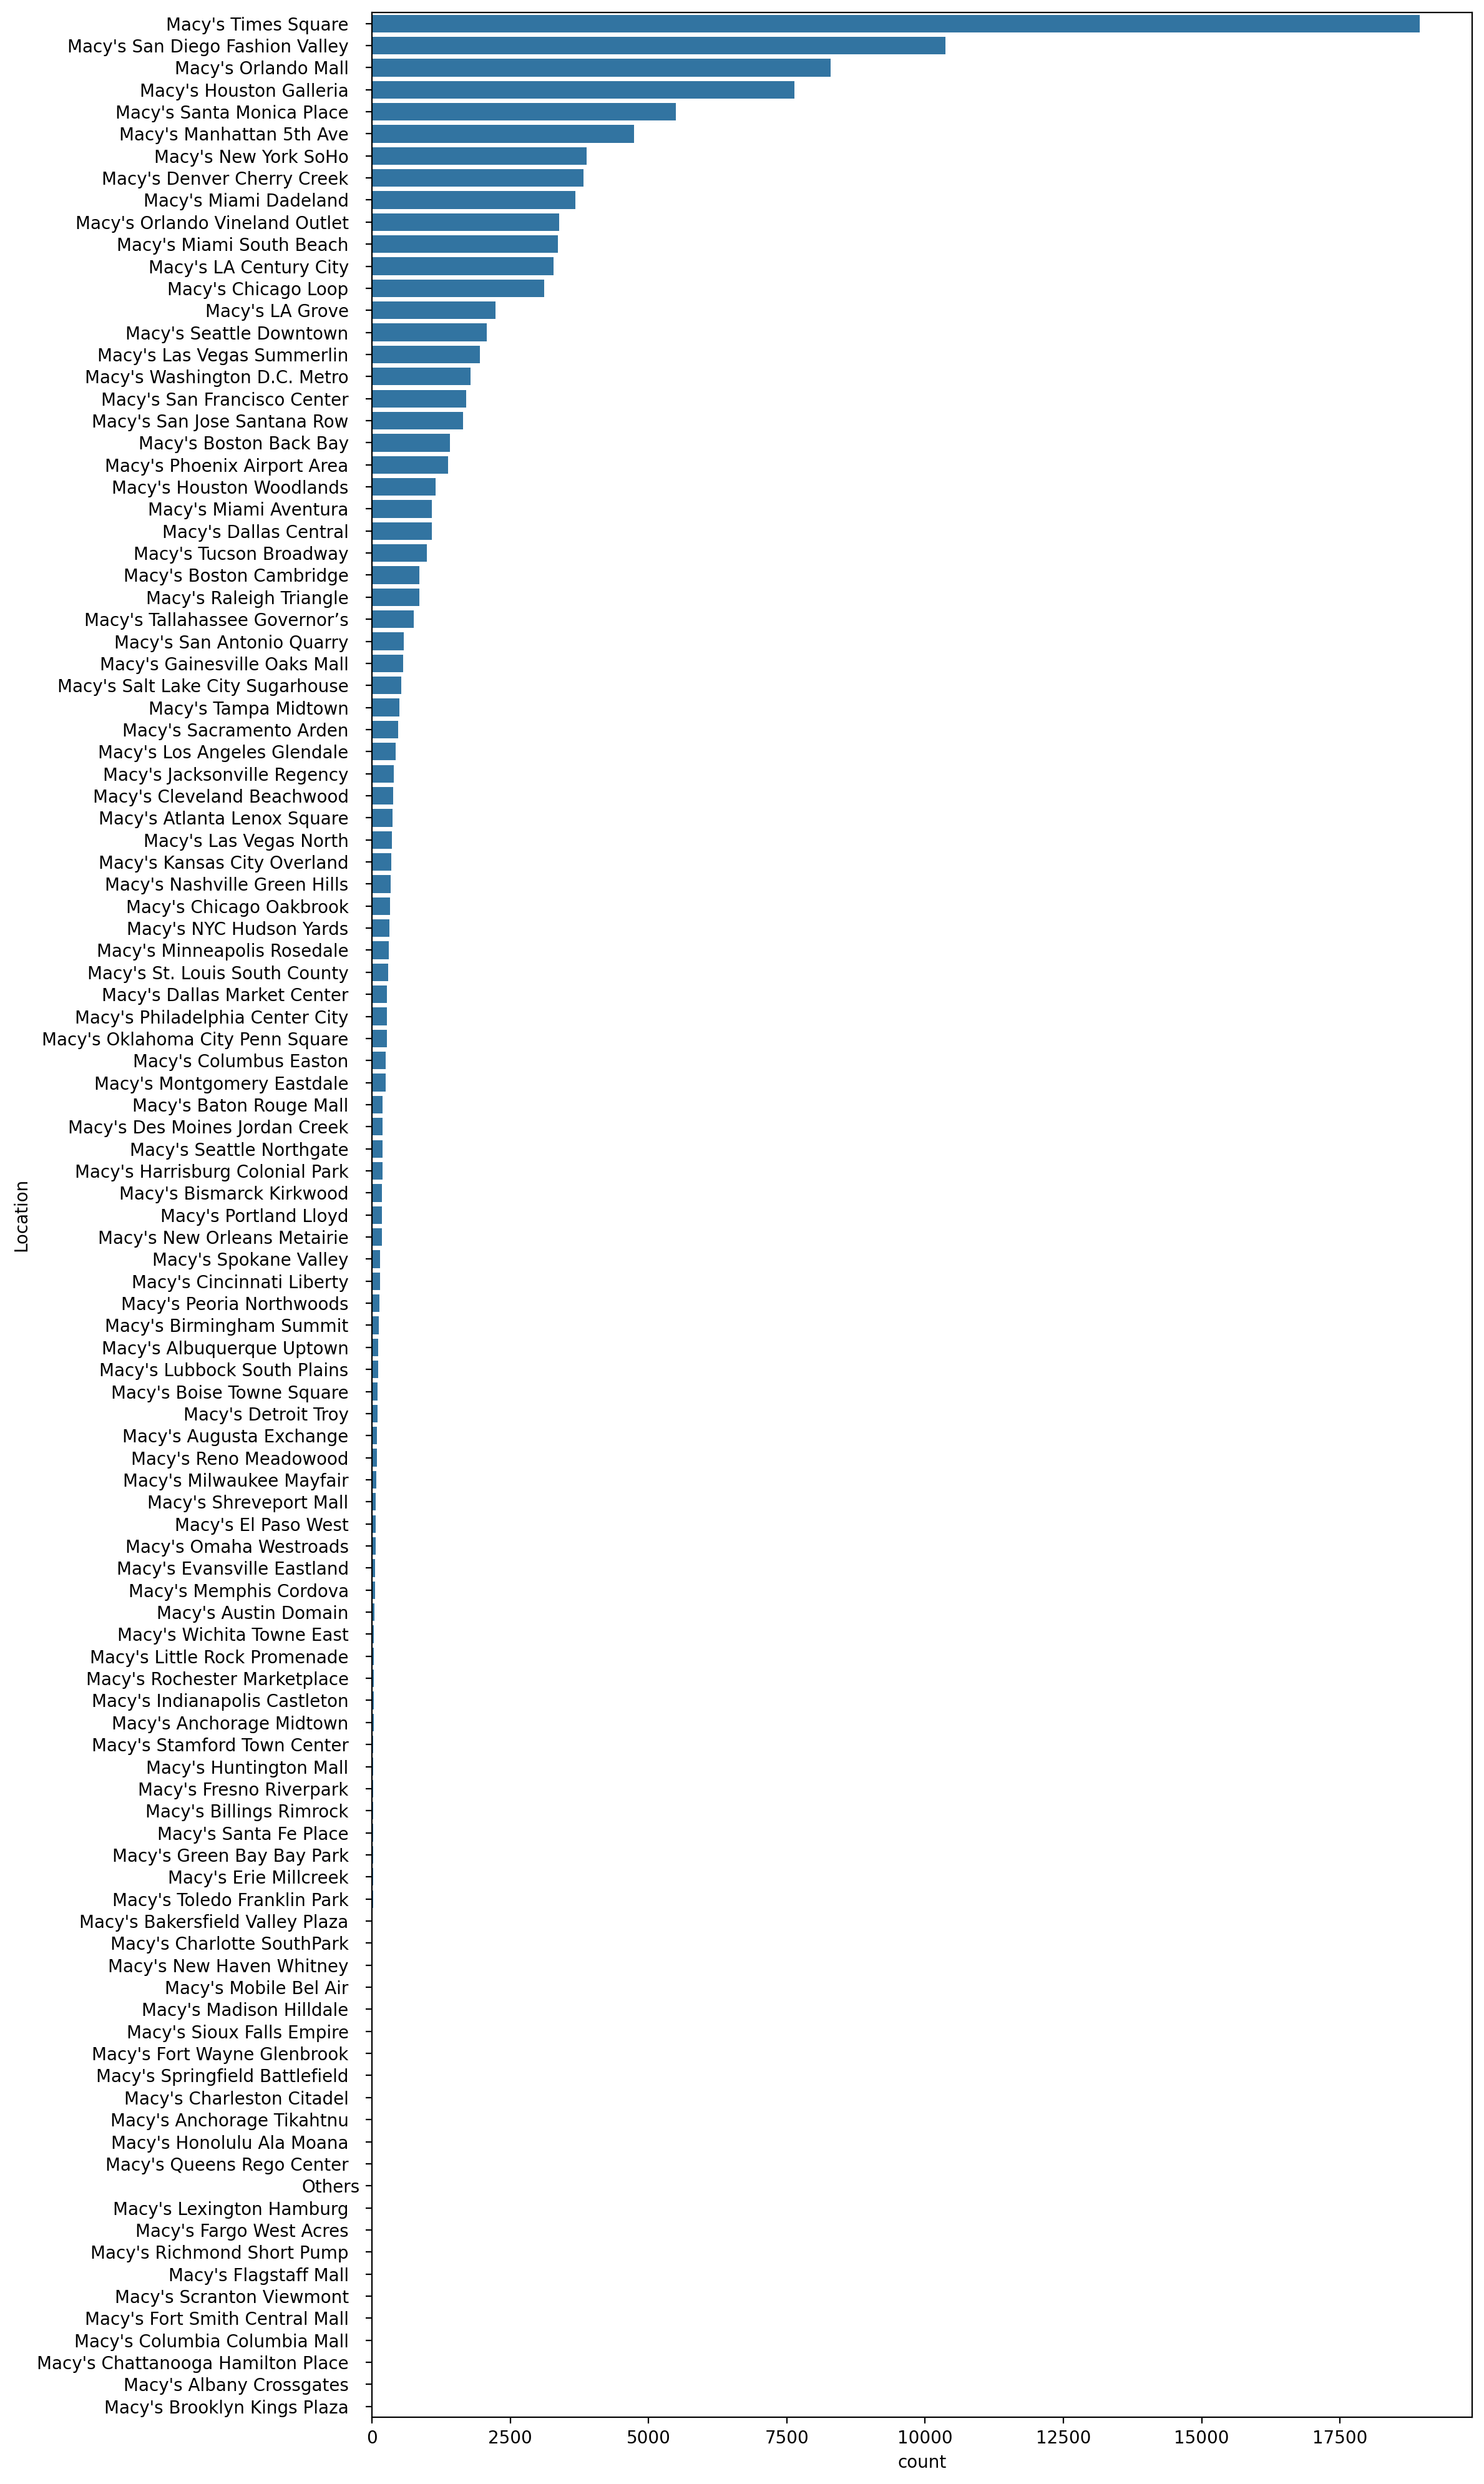

In [74]:
plt.figure(figsize = (12, 20))
order = df['Location'].value_counts().index
sns.countplot(df['Location'], order = order)
plt.tight_layout()

## 檢視商店型態的比例

StoreType
SIS    0.513967
FSS    0.486033
Name: proportion, dtype: float64

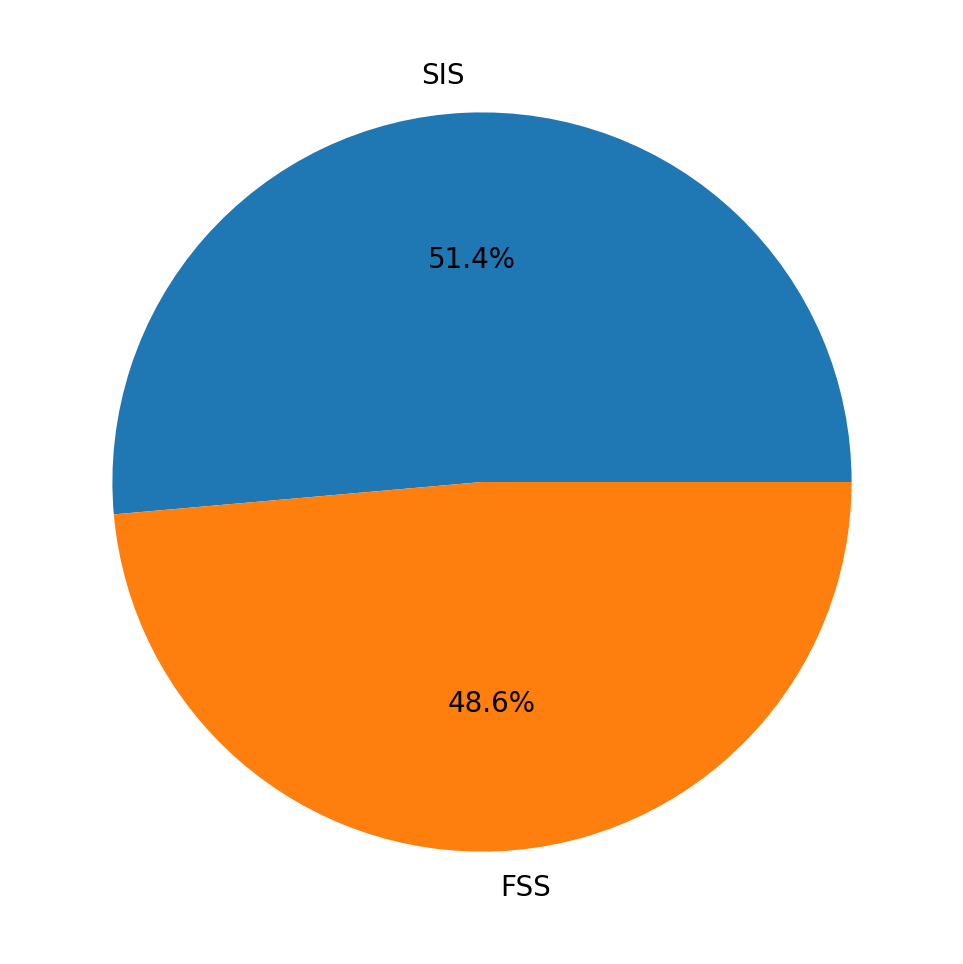

In [40]:
types = df['StoreType'].value_counts()
type_pct = df['StoreType'].value_counts(normalize = True)
plt.figure(figsize = (6, 6))
display(type_pct)
plt.pie(type_pct, labels = ['SIS', 'FSS'], autopct='%1.1f%%');

看來兩種類型的店舖比例差不多

## 檢視品牌分布

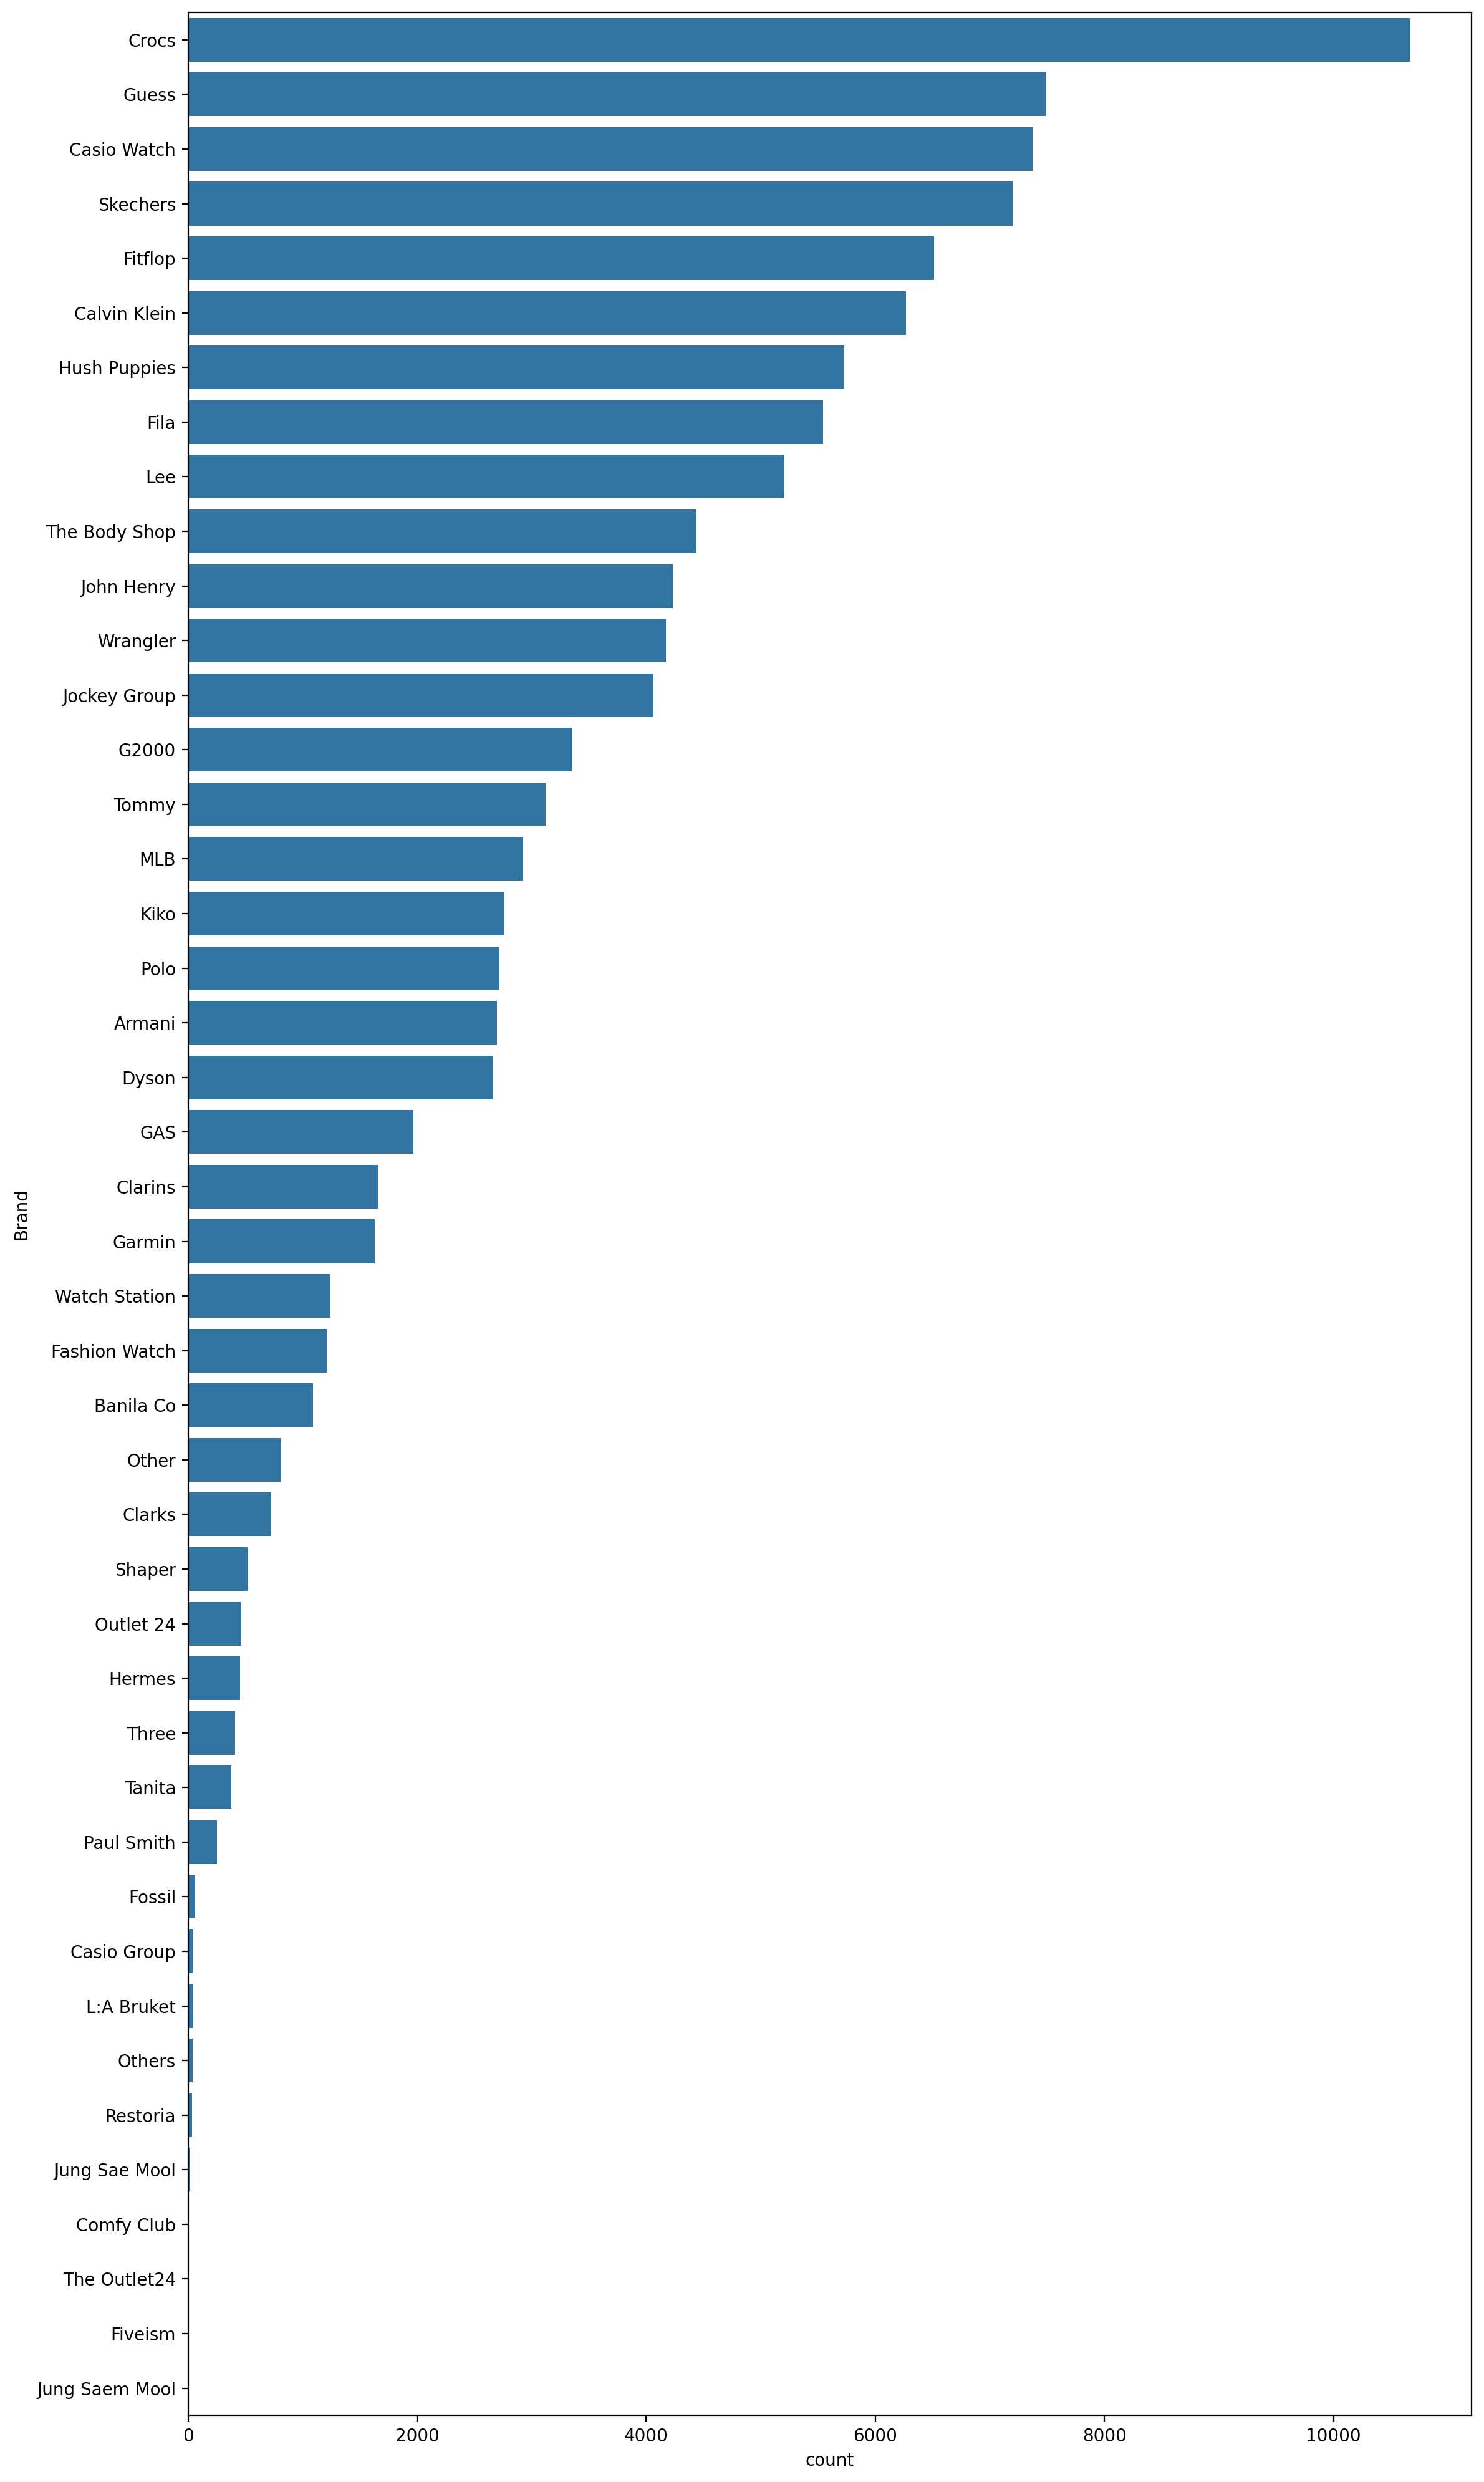

In [42]:
# 由大到小排出品牌購買數最多次的分布
order = df['Brand'].value_counts().index
plt.figure(figsize = (12, 20))
sns.countplot(df['Brand'], order = order)
plt.tight_layout()

這些品牌的銷售次數經過大到小的排序後變這樣，看你們能挖出啥吧

## 消費者國籍分布

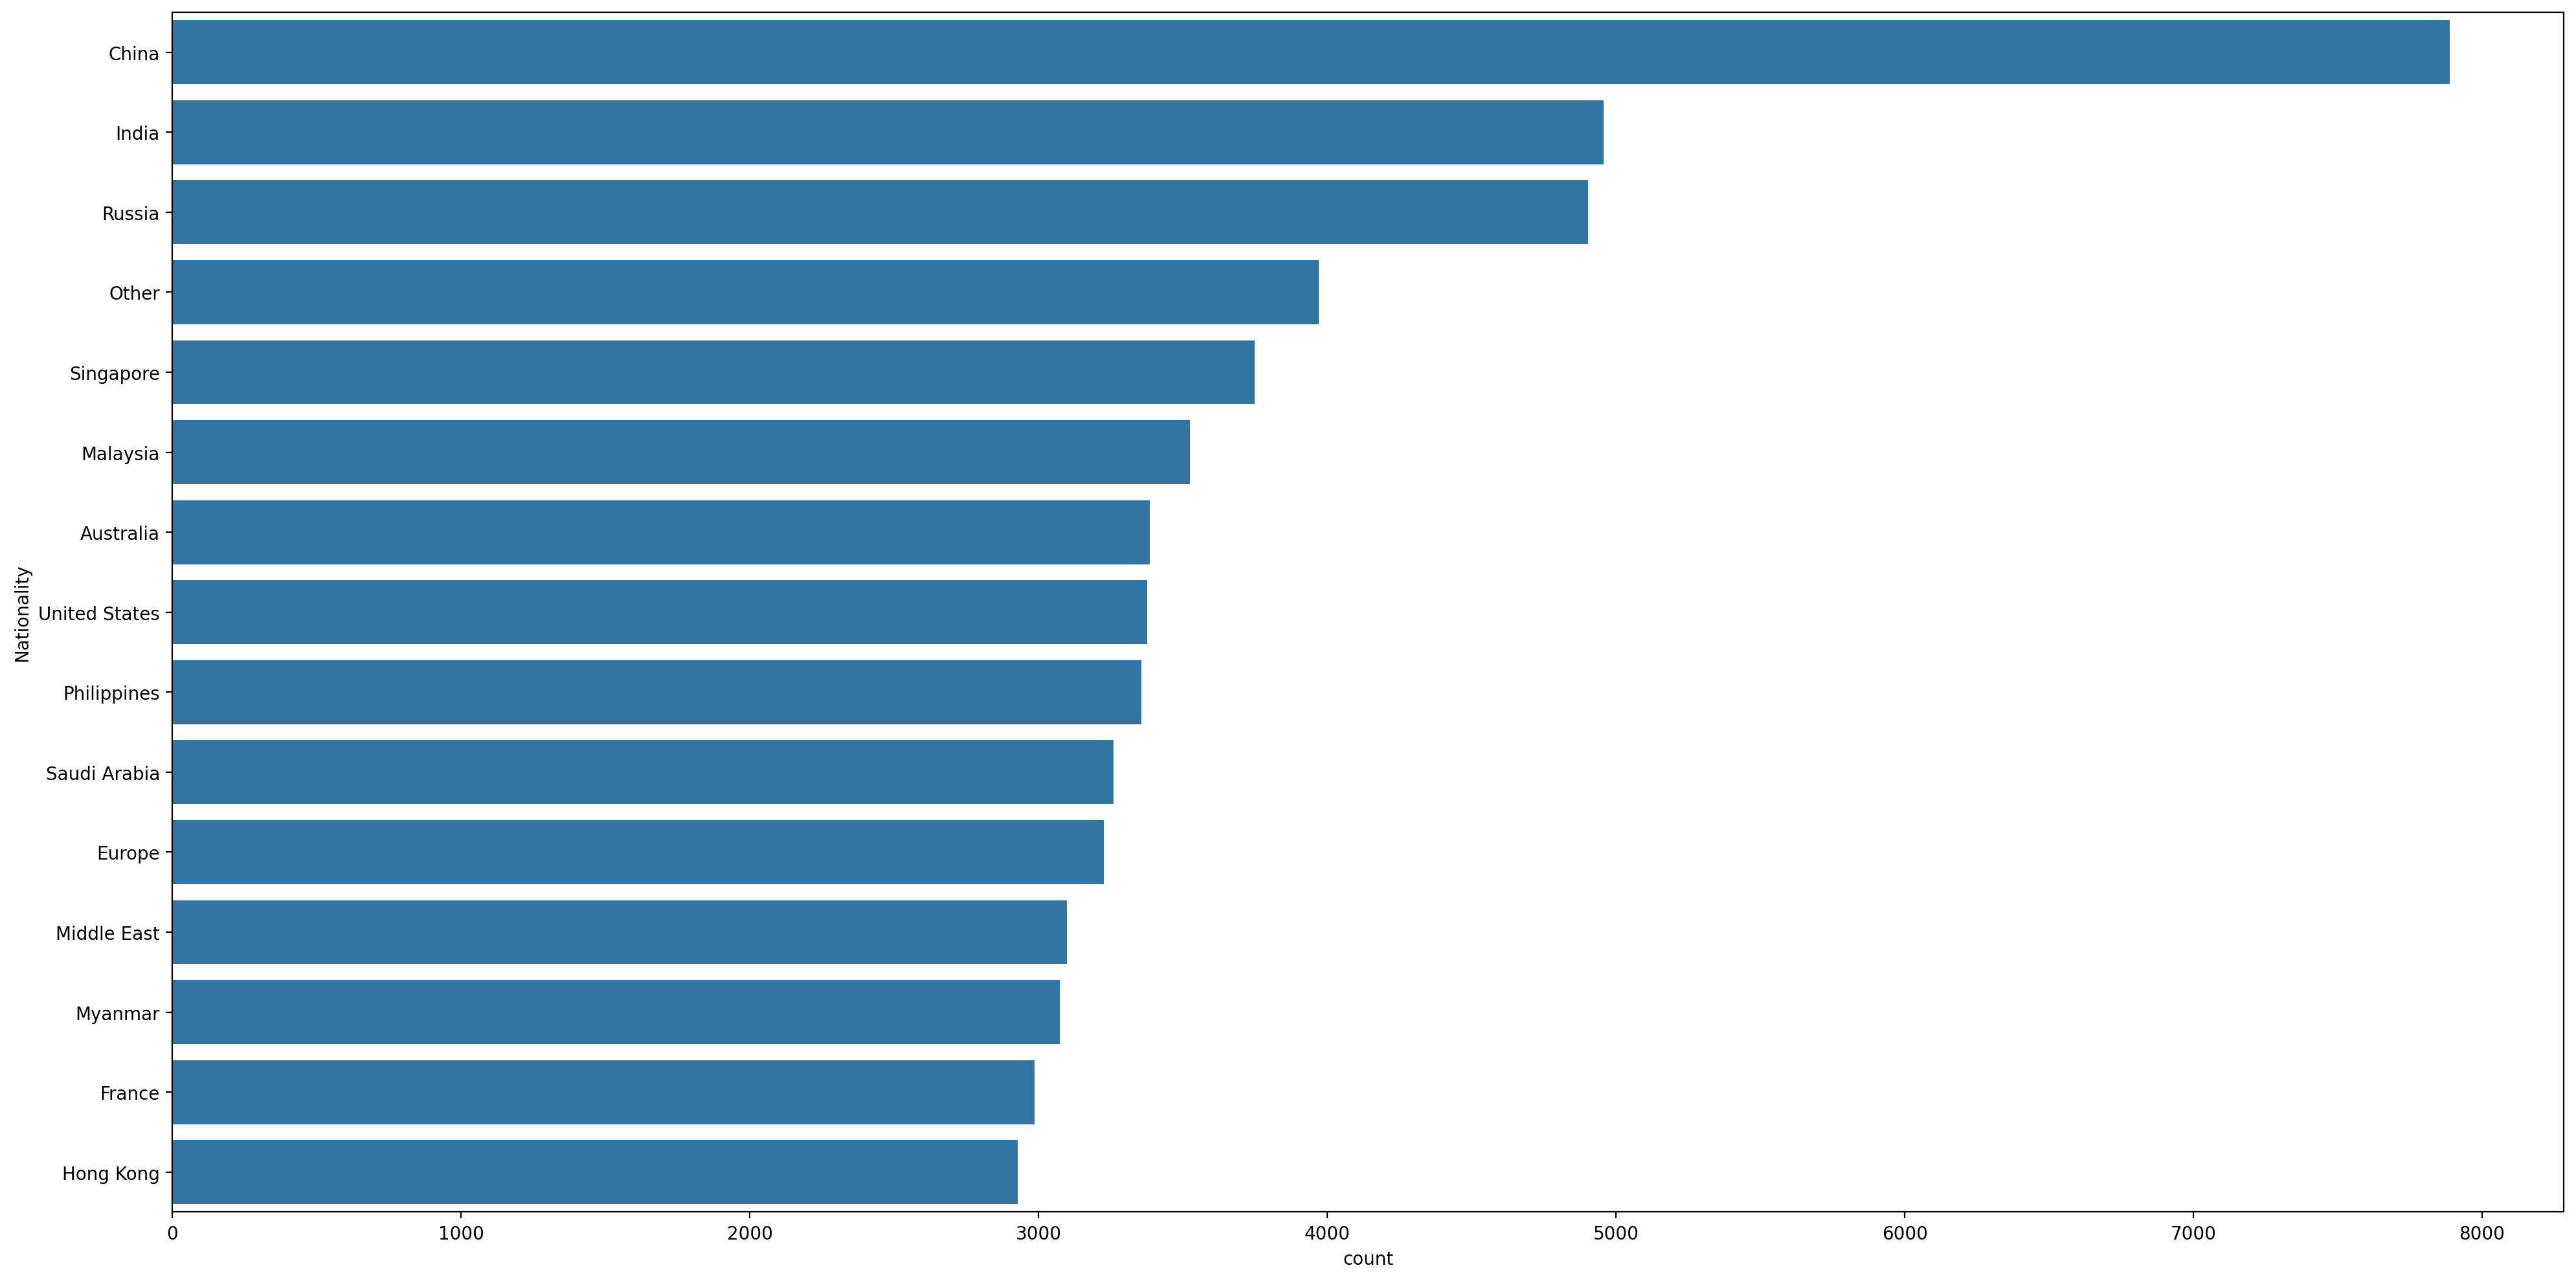

In [72]:
# 取出次數最多的前10個國家
order = df['Nationality'].value_counts().head(15).index
top10_nations = df.loc[df['Nationality'].isin(order)]
plt.figure(figsize = (20, 10))
sns.countplot(data=top10_nations, y='Nationality', order=order)
plt.tight_layout()

因為國家太多了，所以我只列舉出消費數前20多的國家，我們可以看到超多中國人啊，亞洲的人數或許佔大多數喔

# 多變量分析
## 年、月份與銷售額的趨勢

Text(0.5, 1.0, 'Monthly Sales Trend in 2023')

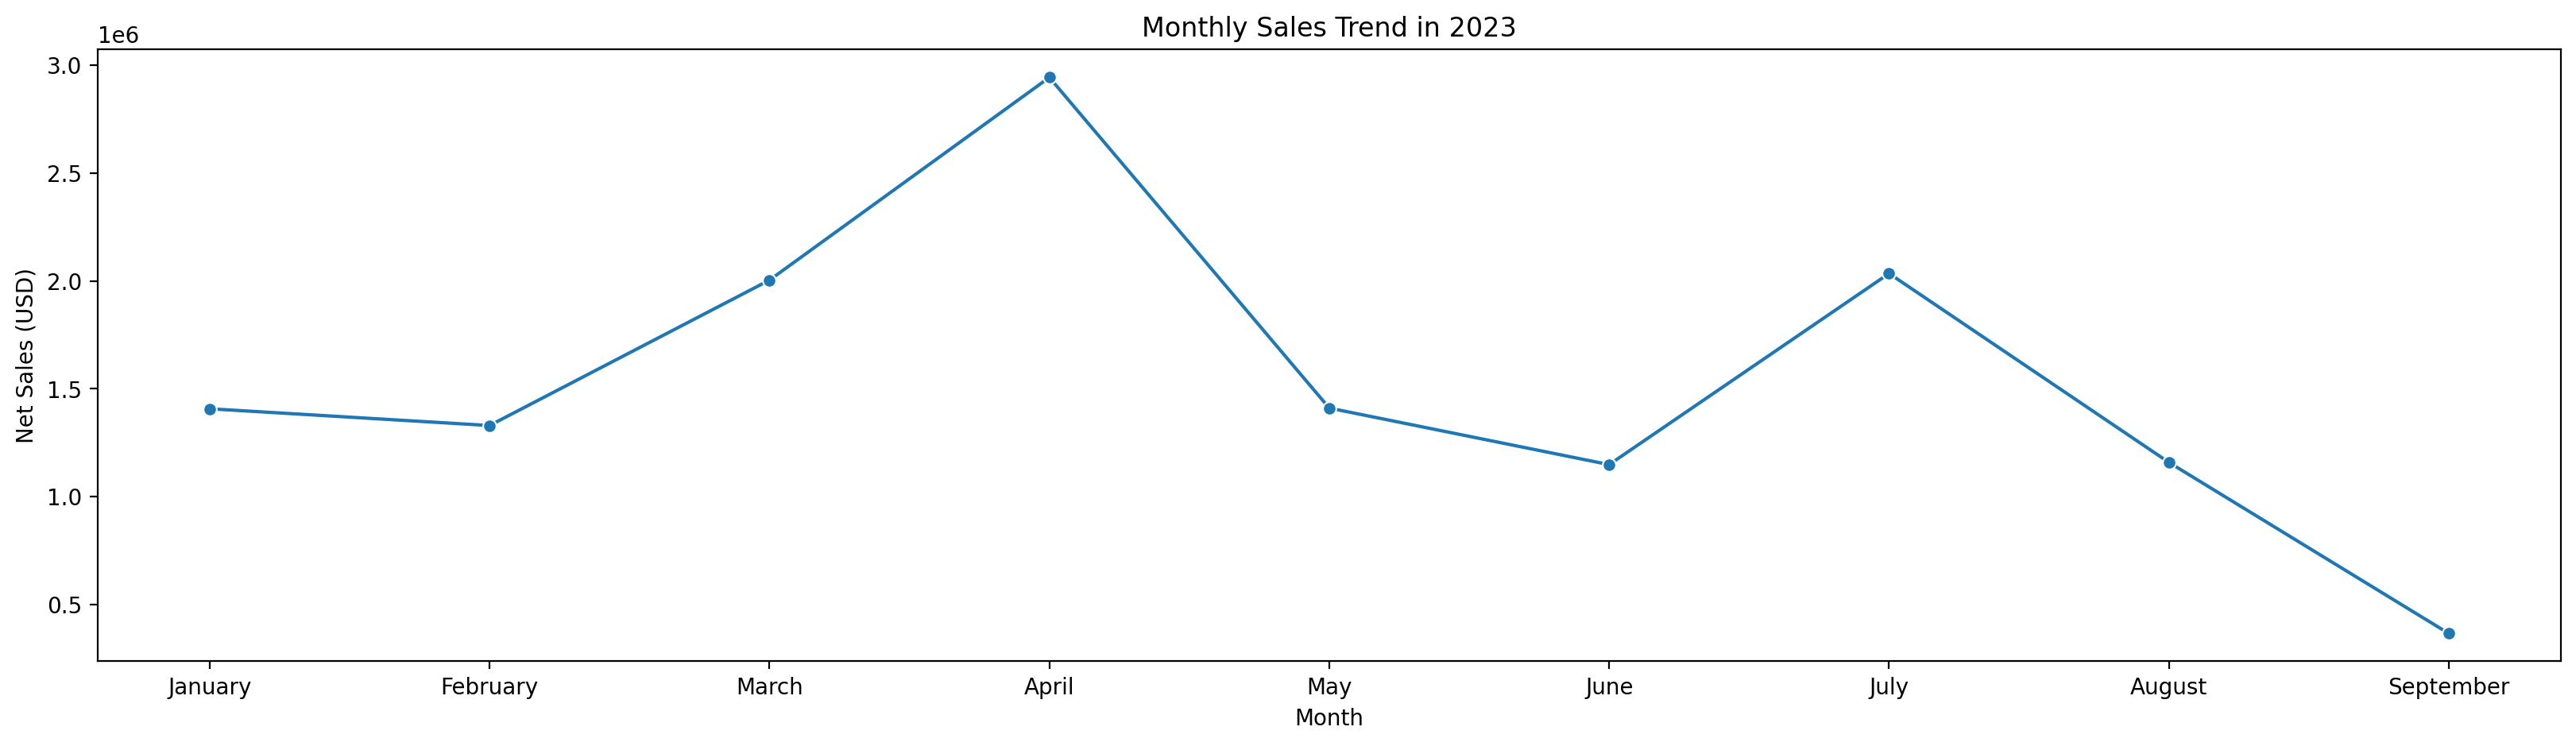

In [109]:
# 繪製2023年每月的銷售量趨勢
year_2023 = df.loc[df['Year'] == 2023]
monthly_sales_2023 = year_2023.groupby('Month')['Net Sales (USD)'].sum().reset_index()

plt.figure(figsize = (20, 5))
sns.lineplot(data=monthly_sales_2023, x='Month', y='Net Sales (USD)', marker='o')
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']
plt.xticks(ticks = range(len(order)), labels = order)
plt.title('Monthly Sales Trend in 2023')

可以觀察到在2023年時，**四月、七月**的銷售金額突然升高了

Text(0.5, 1.0, 'Monthly Sales Trend in 2024')

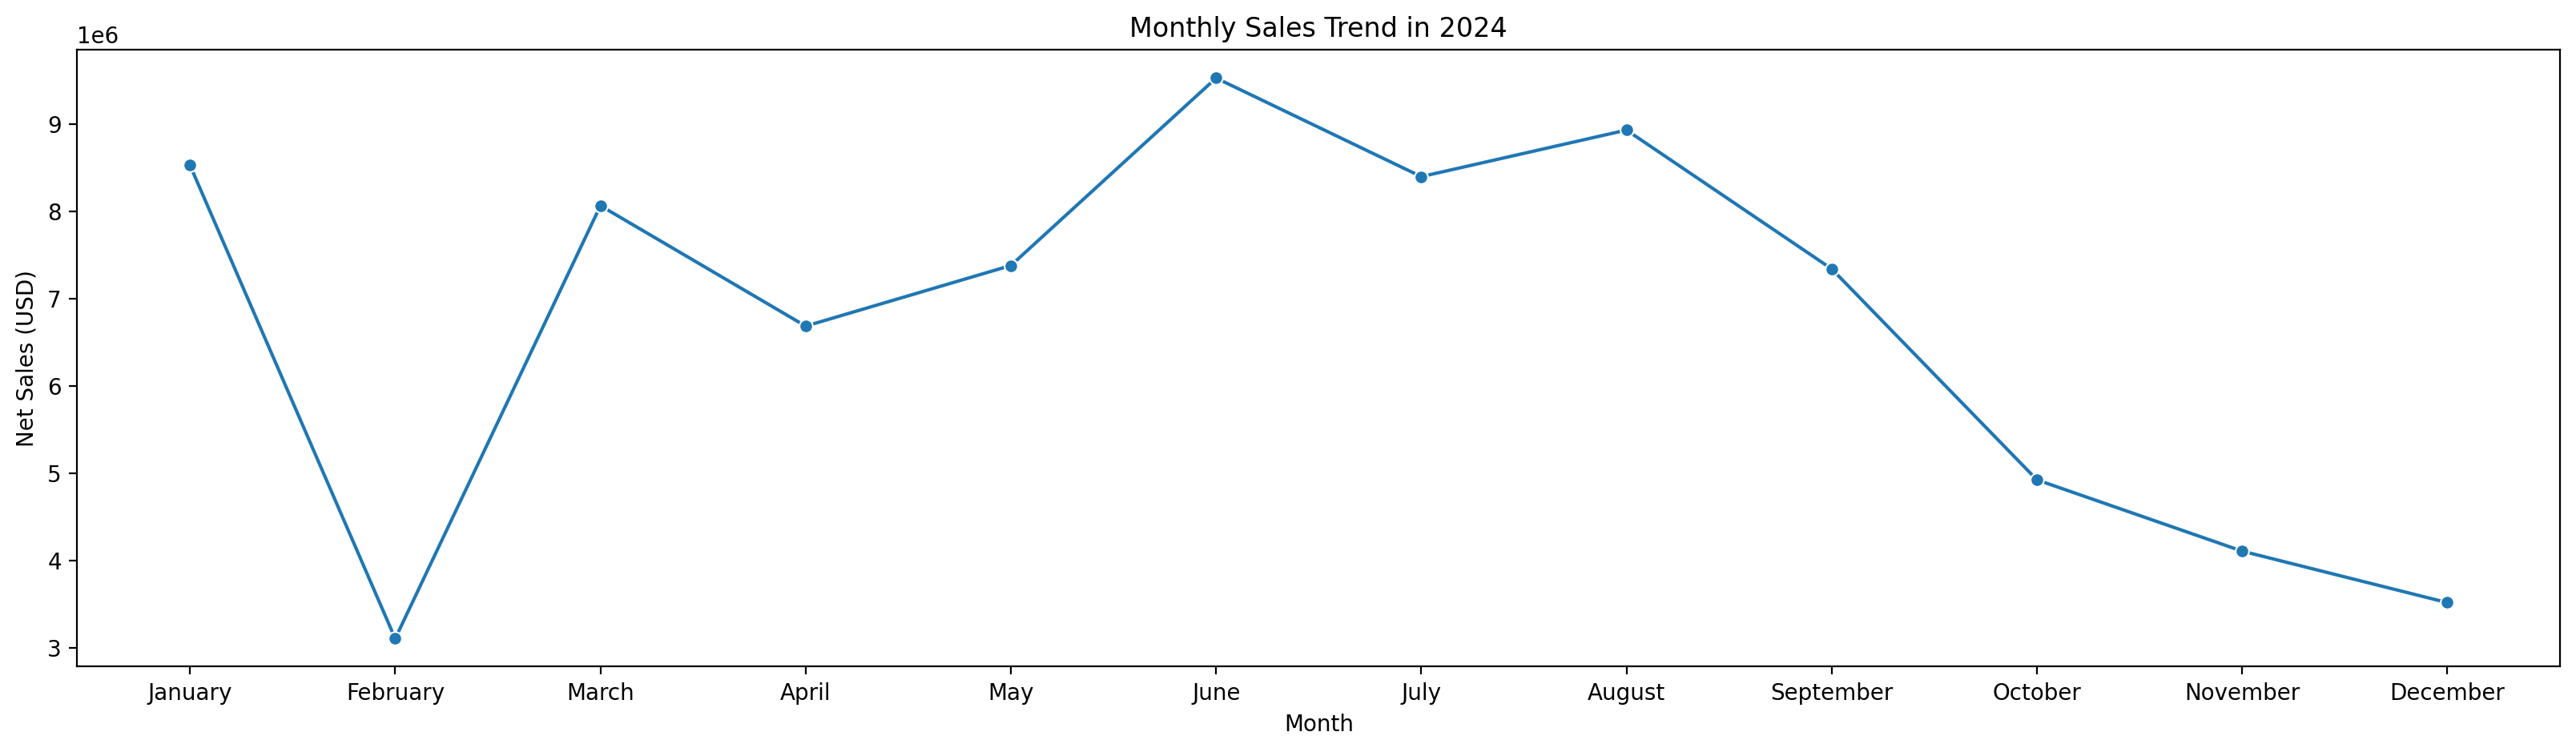

In [110]:
# 繪製2024年每月的銷售量趨勢
year_2024 = df.loc[df['Year'] == 2024]
monthly_sales_2024 = year_2024.groupby('Month')['Net Sales (USD)'].sum().reset_index()
plt.figure(figsize = (20, 5))
sns.lineplot(data=monthly_sales_2024, x='Month', y='Net Sales (USD)', marker='o')
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(ticks = range(len(order)), labels = order)
plt.title('Monthly Sales Trend in 2024')

我們可以看到，在一月銷售額還蠻高的，但不知道什麼原因二月時銷售額驟降，到了三月又突然上升，交給你們解讀吧

### 各品牌銷售額分佈

Text(0.5, 1.0, 'Top 10 Brands by Net Sales (2023-2024)')

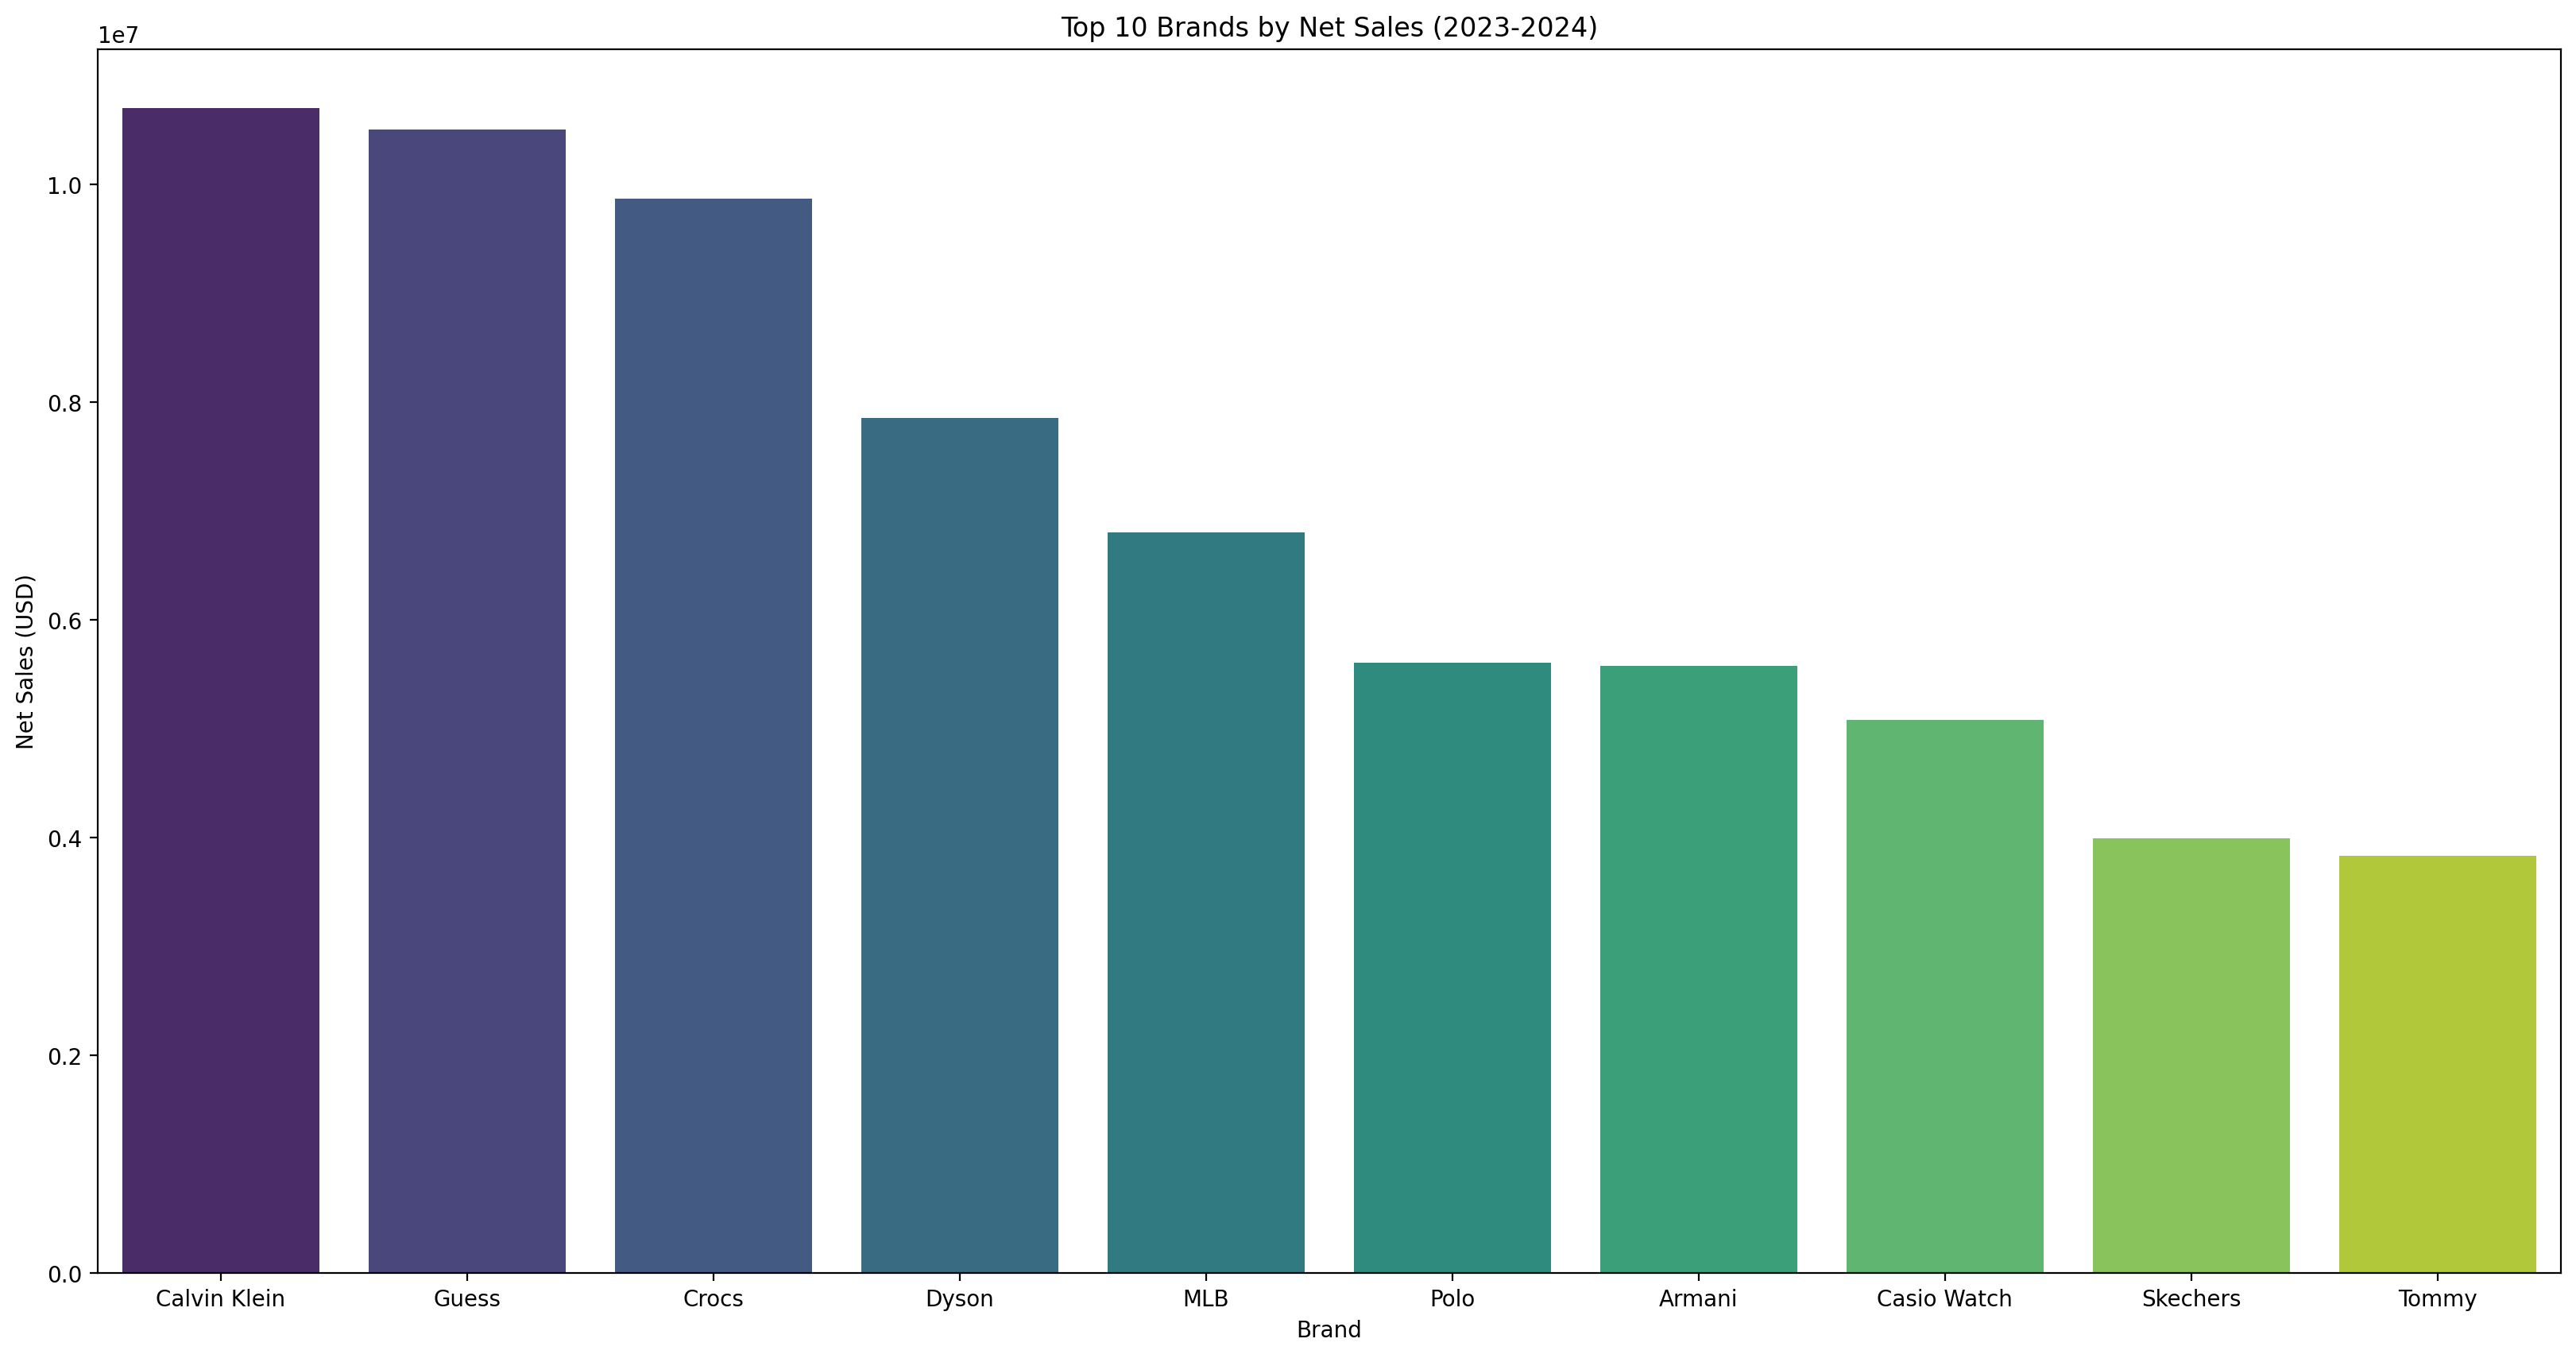

In [121]:
# 找出銷售額前10名的品牌
brand_sales = df.groupby('Brand')['Net Sales (USD)'].sum().reset_index()
top10_brands = brands_sales.sort_values(by = 'Net Sales (USD)', ascending = False).head(10)
# 繪製各品牌的長條圖
plt.figure(figsize = (20, 10))
sns.barplot(data = top10_brands, x = 'Brand', y = 'Net Sales (USD)',palette='viridis')
plt.title('Top 10 Brands by Net Sales (2023-2024)')

彩色長條圖超炫的吧，這是銷售量top10的品牌

彩色的長條圖超炫的吧，上面是銷售量top10的品牌

### 各門市銷售額表現

Text(0.5, 1.0, 'Top 10 Brands by Net Sales (2023-2024)')

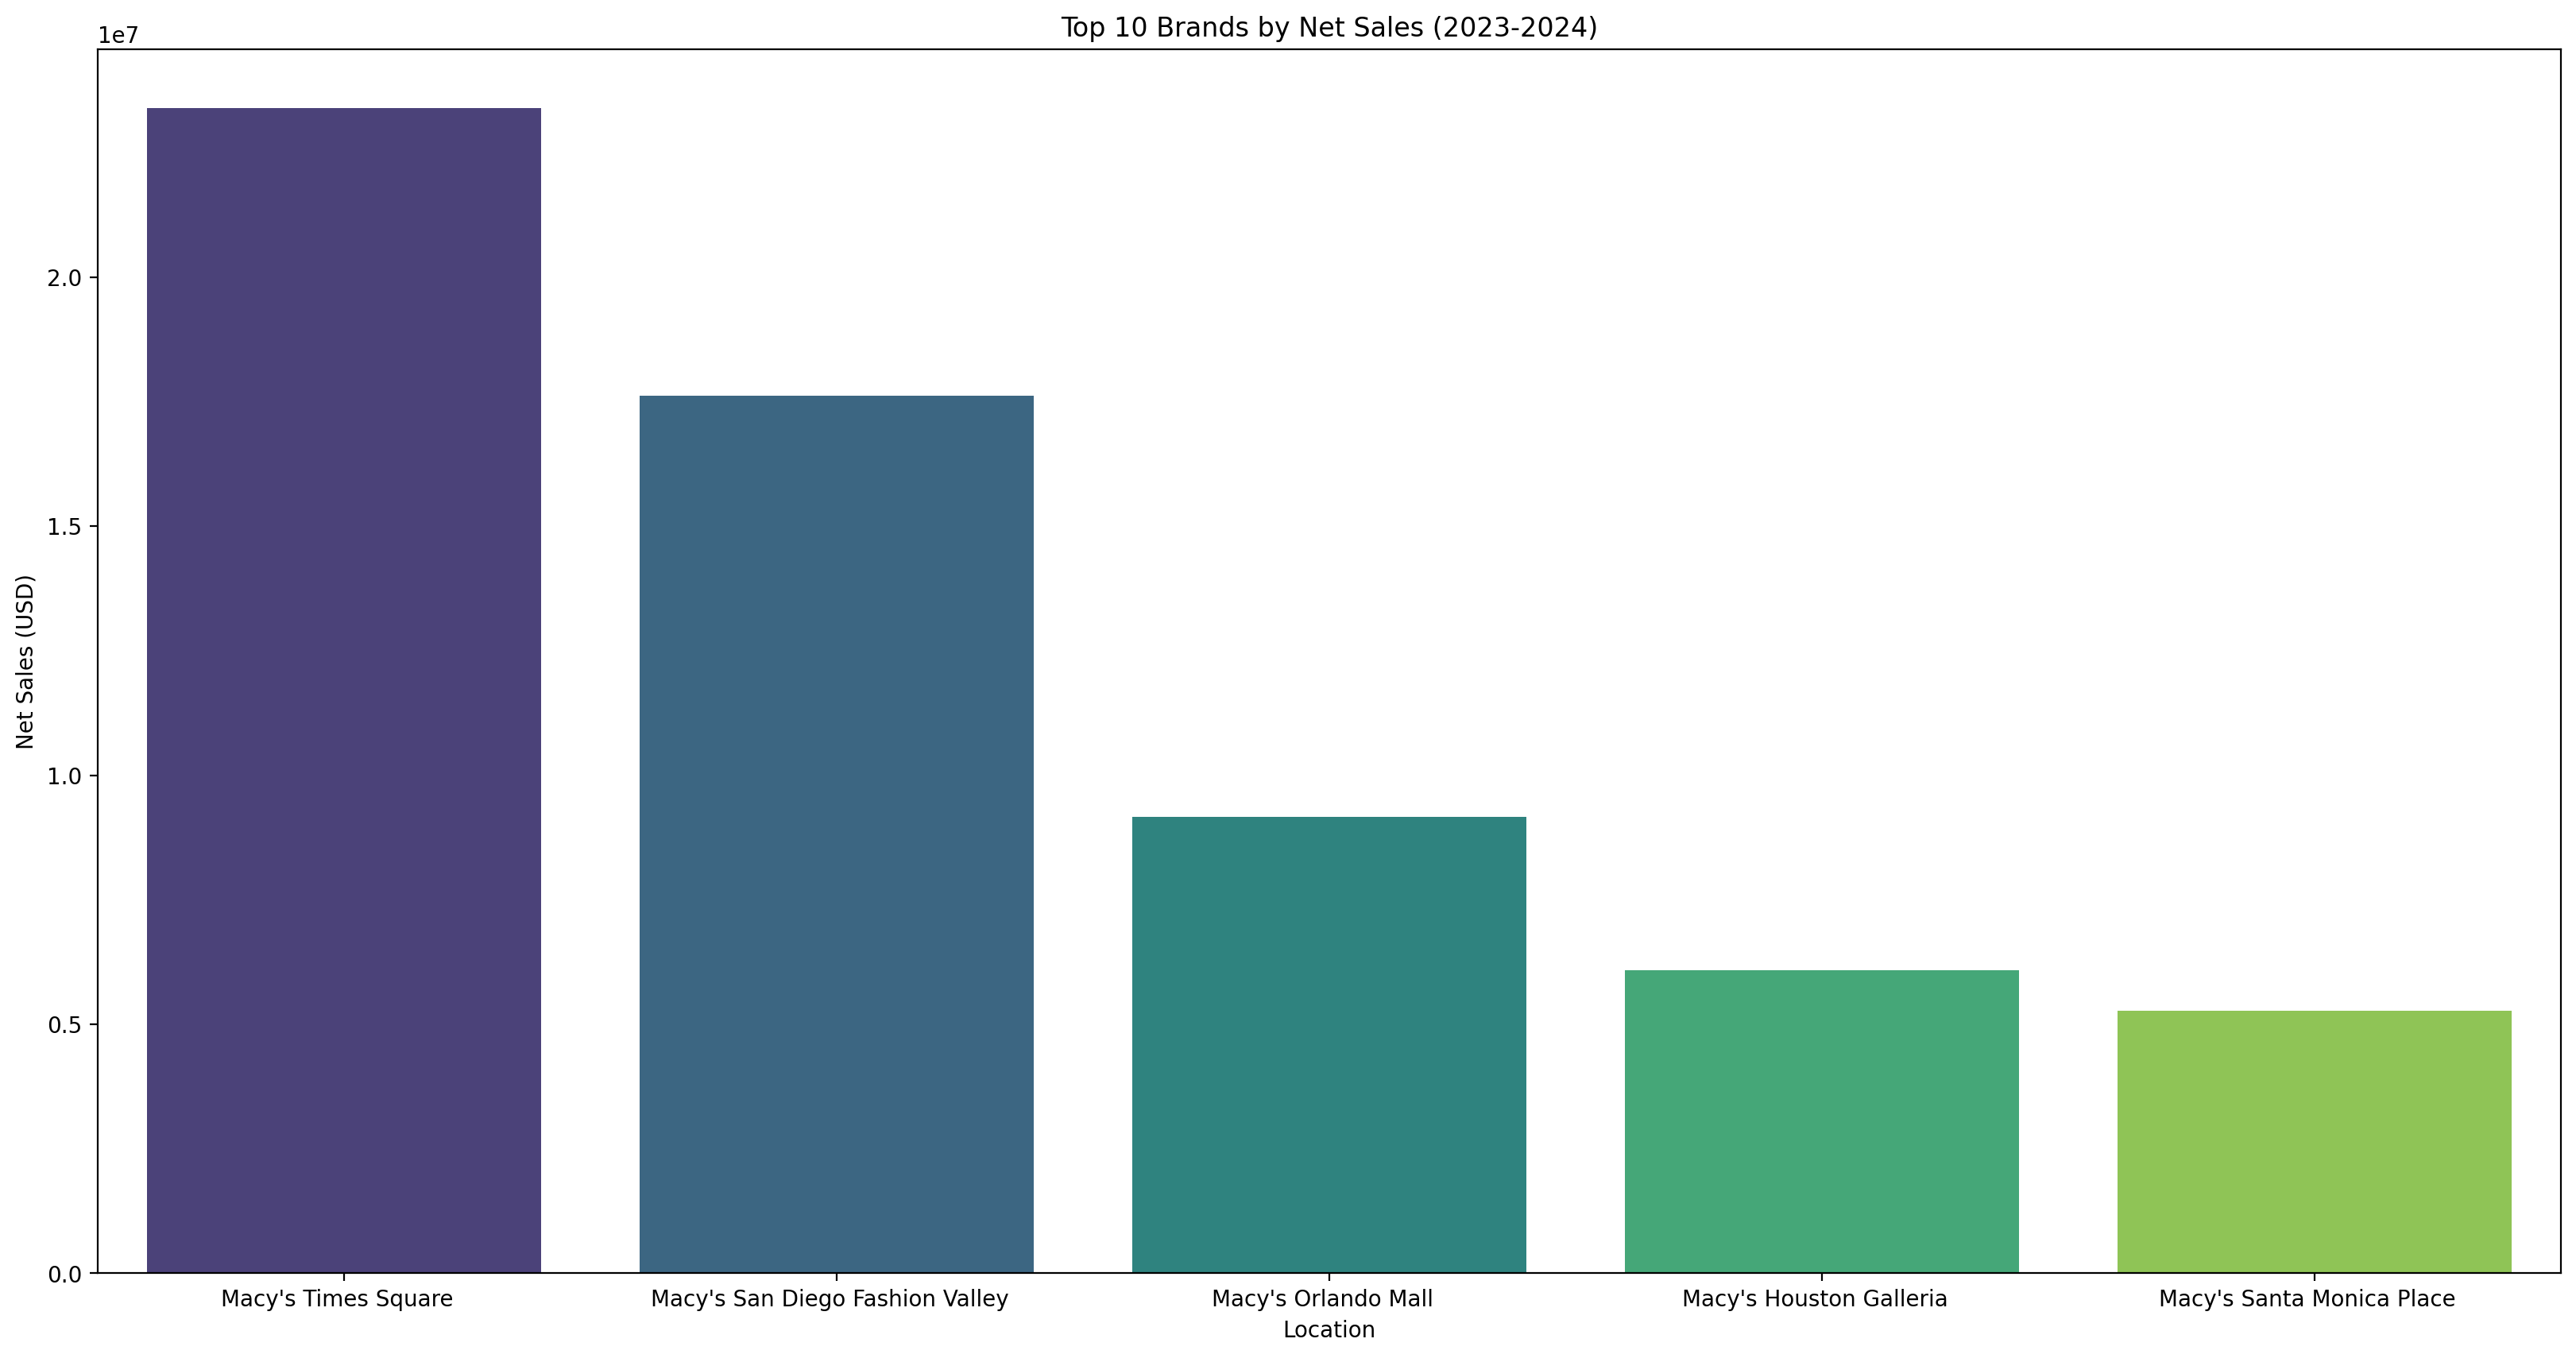

In [126]:
# 找出銷售額top5的門市
location_sales = df.groupby('Location')['Net Sales (USD)'].sum().reset_index()
top10_location = location_sales.sort_values(by = 'Net Sales (USD)', ascending = False).head(5)
# 繪製各品牌的長條圖
plt.figure(figsize = (20, 10))
sns.barplot(data = top10_location, x = 'Location', y = 'Net Sales (USD)',palette='viridis')
plt.title('Top 10 Brands by Net Sales (2023-2024)')

## SIS與FSS的銷售額差異

<Axes: xlabel='StoreType', ylabel='Net Sales (USD)'>

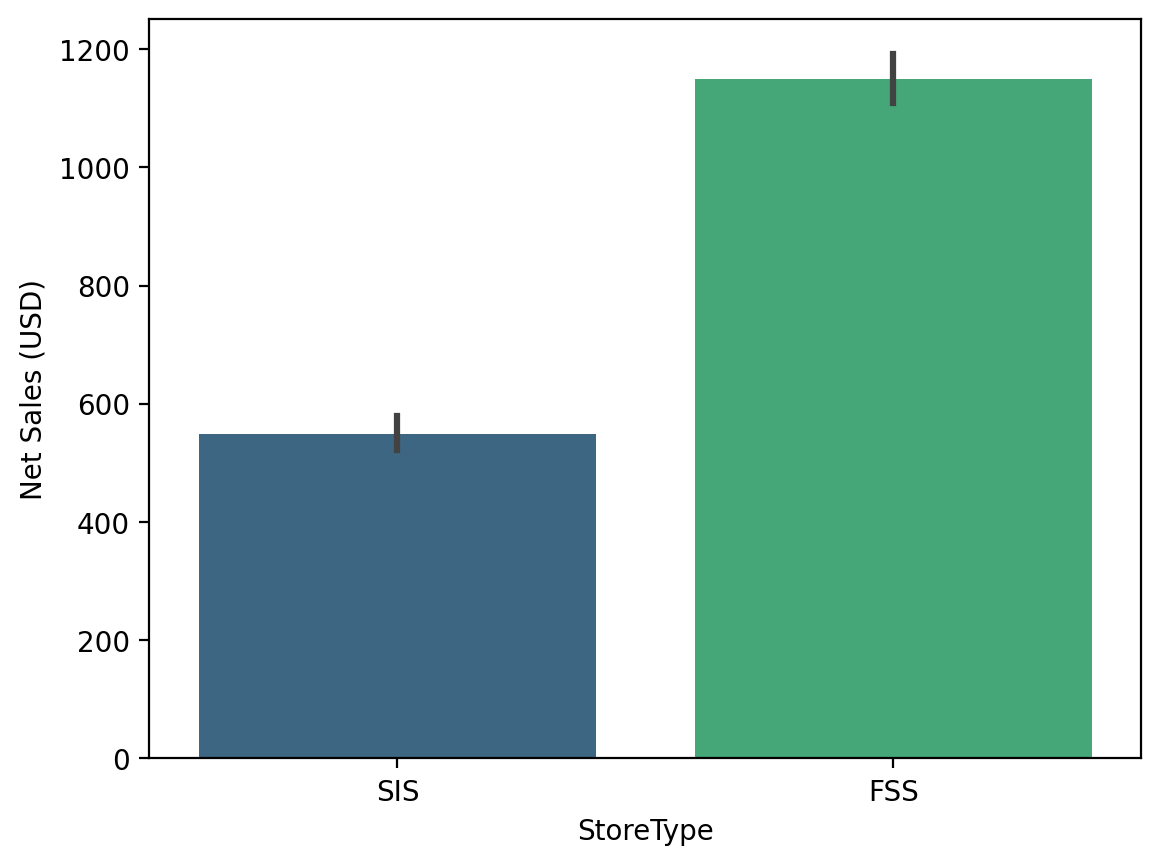

In [131]:
sns.barplot(x = 'StoreType', y = 'Net Sales (USD)', data = df, palette='viridis')

我們可以看出旗艦店的消費額比較大

## 各國消費者的銷售額分佈

<Axes: xlabel='Nationality', ylabel='Net Sales (USD)'>

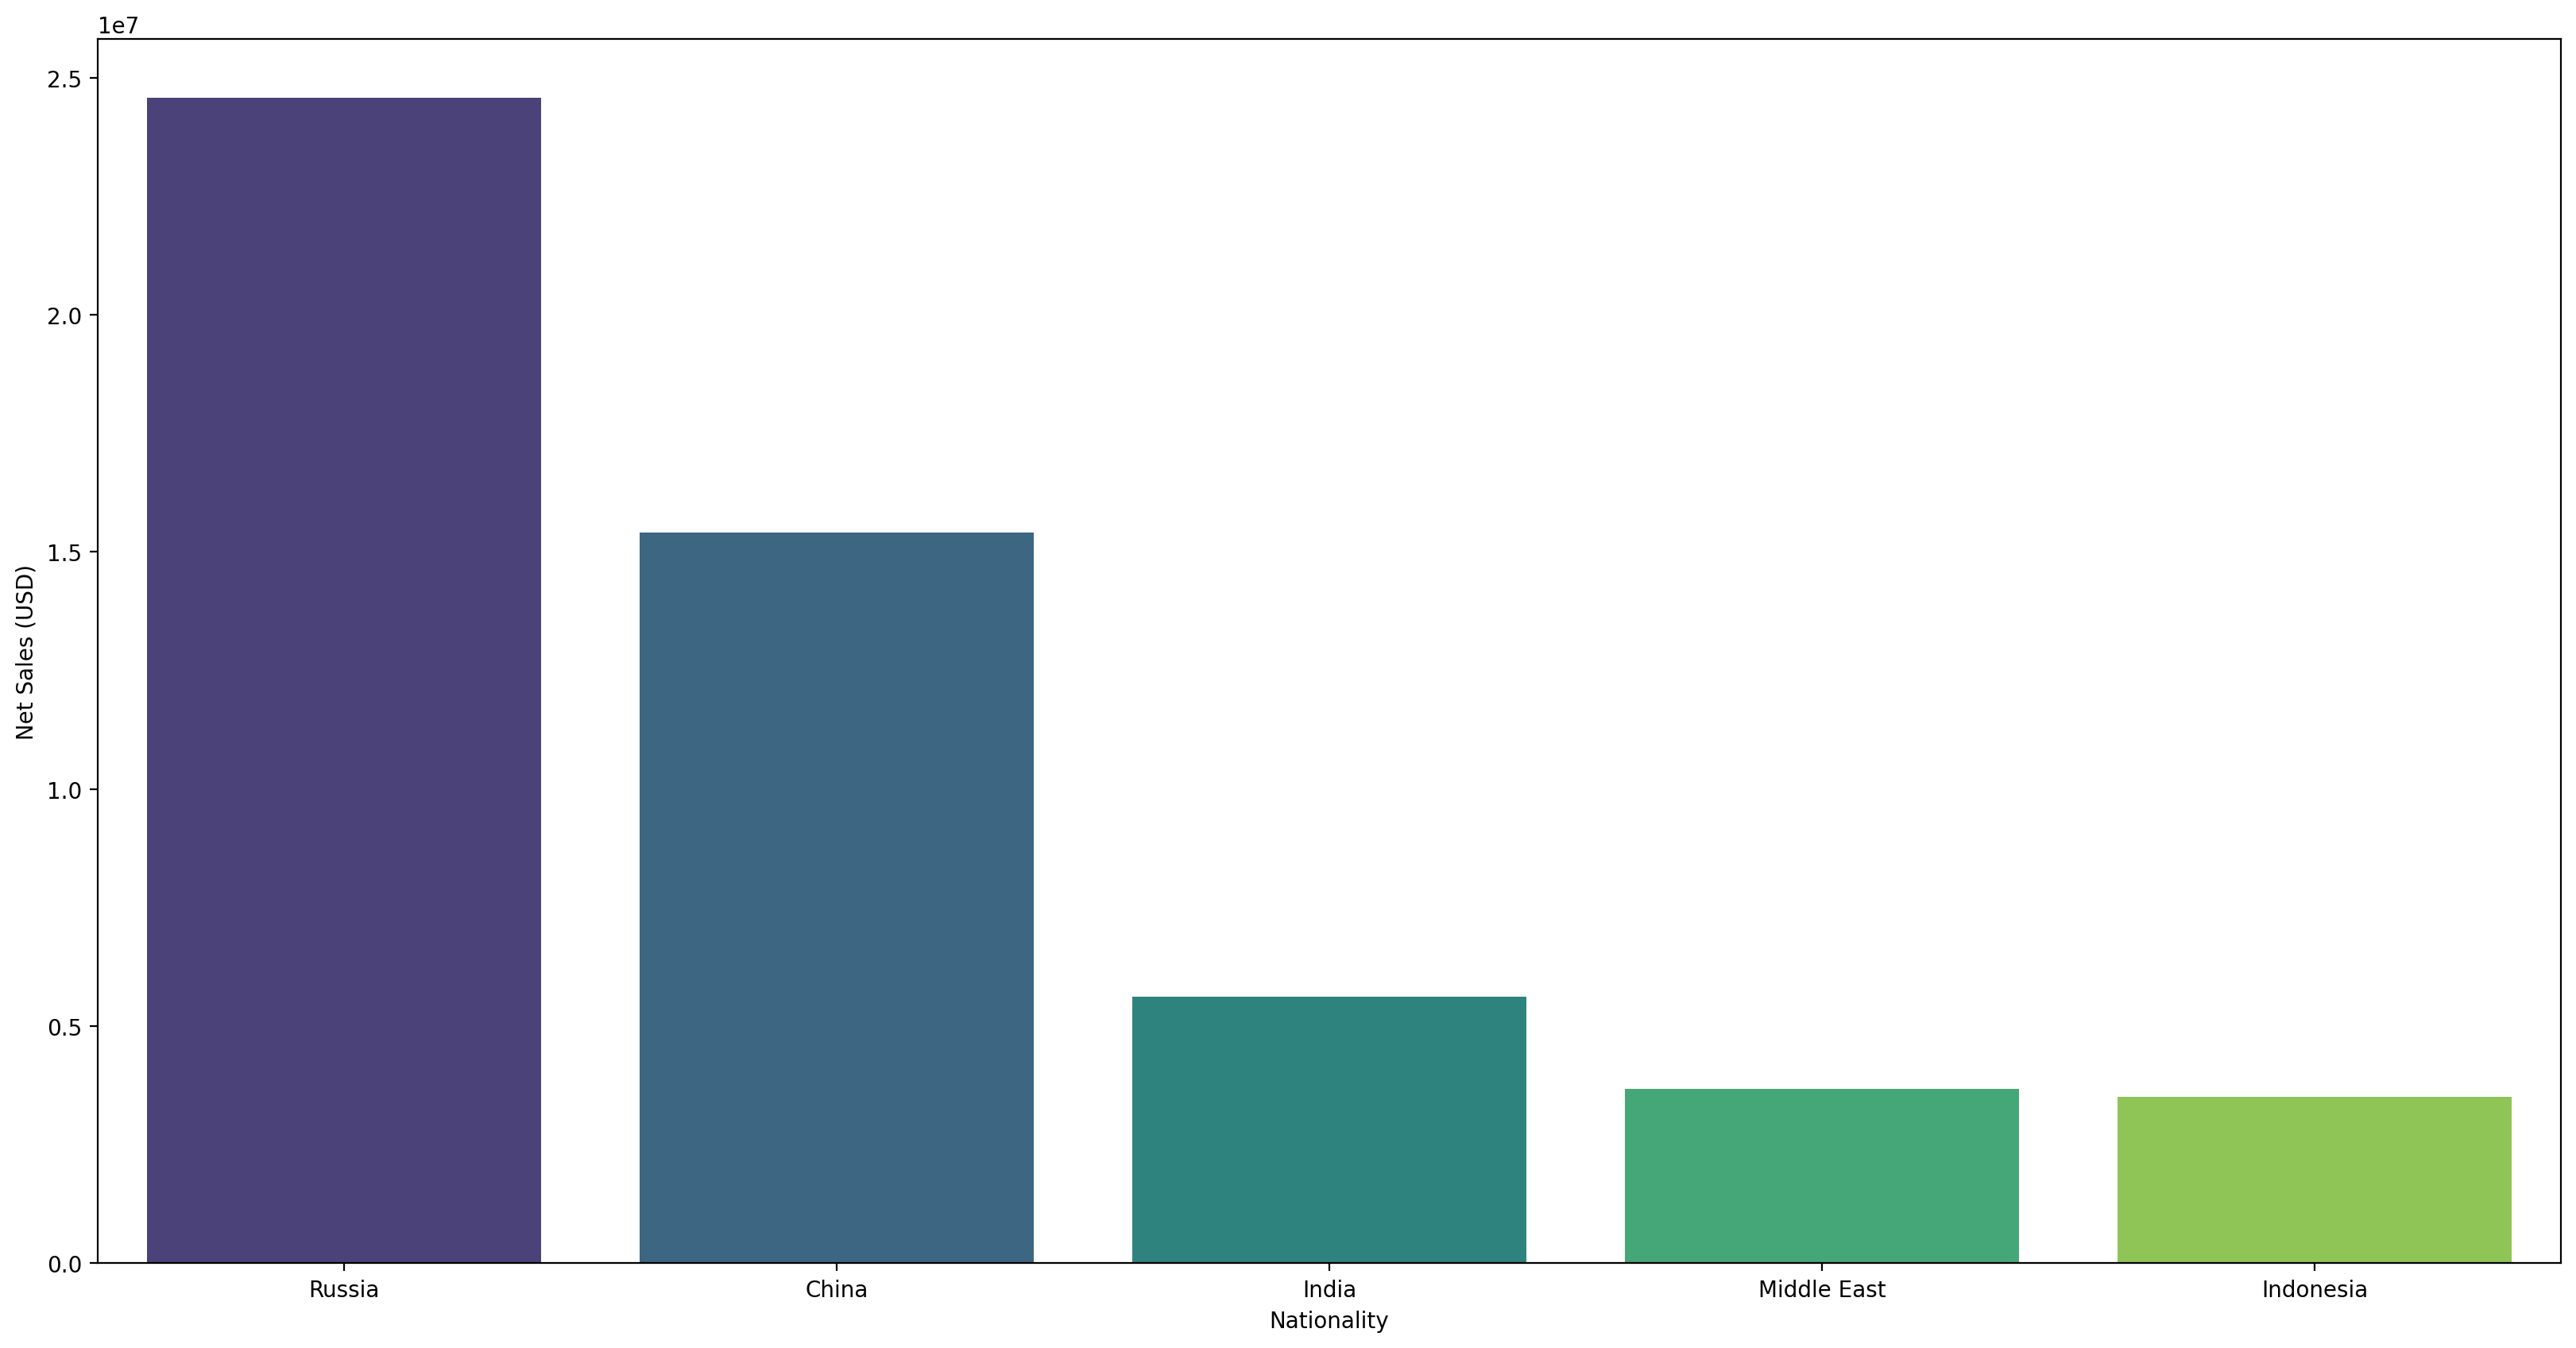

In [134]:
nation_sales = df.groupby('Nationality')['Net Sales (USD)'].sum().reset_index()
top10_nation = nation_sales.sort_values(by = 'Net Sales (USD)', ascending = False).head(5)
# 繪製各品牌的長條圖
plt.figure(figsize = (20, 10))
sns.barplot(data = top10_nation, x = 'Nationality', y = 'Net Sales (USD)',palette='viridis')

看來消費最高的是俄羅斯人，中國第二高，其他國家和他們都有些差距